In [1]:
%load_ext lab_black

In [2]:
import os

os.chdir("../..")

In [17]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from utils.read_final_data import read_train_test_data
from utils.visualisation import (
    get_metrics_of_model,
    plot_clustering,
    plot_clustering_from_clusters,
)
from models.metrics import metrics_list

pd.options.display.float_format = "{:,.2f}".format

In [4]:
X_train, X_test = read_train_test_data()
df_train, df_test = (
    pd.read_pickle("resources/data/train_data.pkl"),
    pd.read_pickle("resources/data/test_data.pkl"),
)
train_clusters = df_train.label
test_clusters = df_test.label

In [12]:
n_clusters = 5
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

In [6]:
get_metrics_of_model(agglomerative, metrics_list, X_train, X_test)

value                 
sample                         test            train
metric                                              
Silhouette                 0.135428         0.082708
mean_inclust_dist         59.717499        81.446591
min_interclust_dist       42.528906           44.658
wcss                 4050190.939043  17885281.897624

In [13]:
df_train = df_train.assign(pred=agglomerative.fit_predict(X_train))
df_test = df_test.assign(pred=agglomerative.fit_predict(X_test))

In [9]:
def get_cluster_summary(df):
    summary = pd.pivot(
        data=df.groupby(["label", "pred"], as_index=False).size(),
        index="pred",
        columns="label",
    ).fillna(0)
    return summary.div(summary.values.sum(axis=1), axis=0)

In [18]:
get_cluster_summary(df_train)

size                         
label enron  kos nips nytimes pubmed
pred                                
0      0.02 0.00 0.96    0.02   0.00
1      0.37 0.01 0.01    0.32   0.29
2      0.14 0.43 0.00    0.30   0.13
3      0.51 0.07 0.01    0.08   0.33
4      0.18 0.04 0.03    0.04   0.71

In [19]:
get_cluster_summary(df_test)

size                         
label enron  kos nips nytimes pubmed
pred                                
0      0.02 0.00 0.96    0.02   0.00
1      0.54 0.02 0.02    0.05   0.37
2      0.15 0.38 0.00    0.35   0.11
3      0.59 0.00 0.01    0.14   0.27
4      0.06 0.01 0.01    0.00   0.91

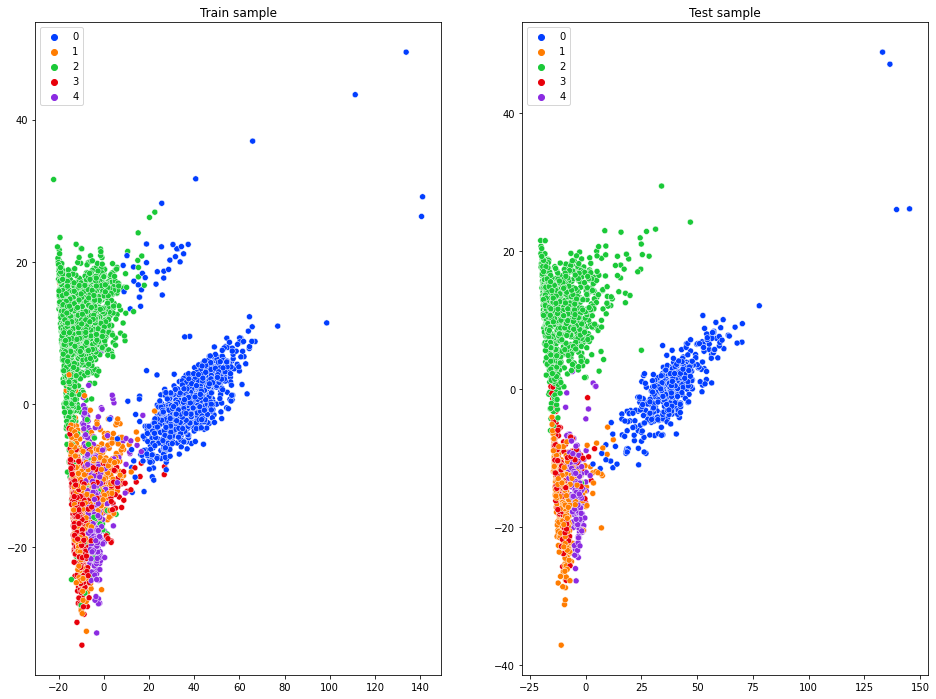

In [16]:
plot_clustering(agglomerative, X_train, X_test)

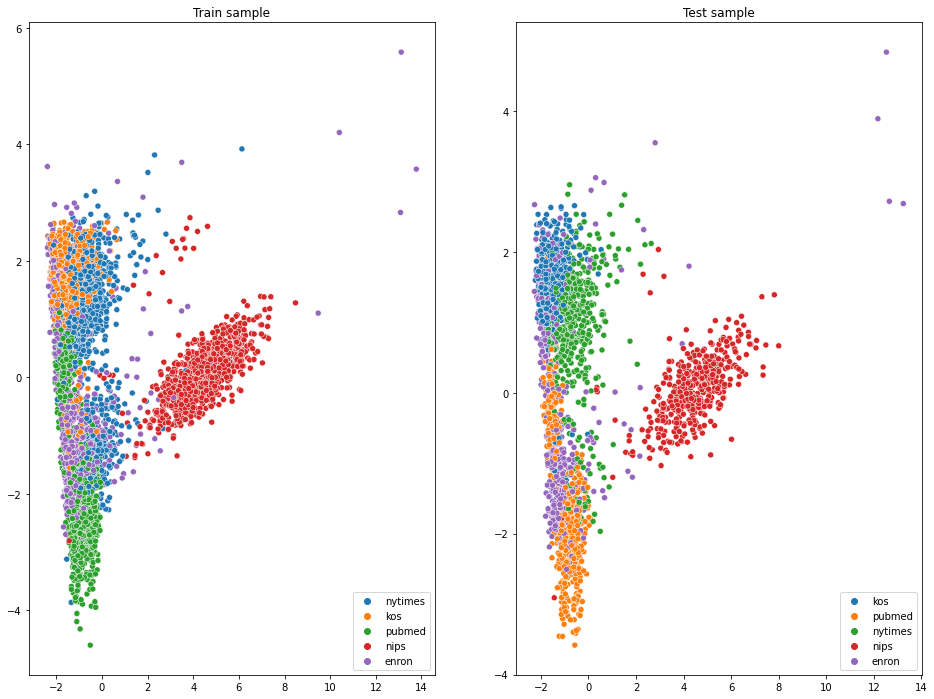

In [ ]:
plot_clustering_from_clusters(X_train, X_test, train_clusters, test_clusters)